In [1]:
from scipy.io import wavfile
sample_rate, data = wavfile.read("New_AS_001.wav")

In [2]:
sample_rate

8000

In [3]:
sampe_rate, data = wavfile.read("New_AS_009.wav")
time = len(data) / sample_rate
time

2.61225

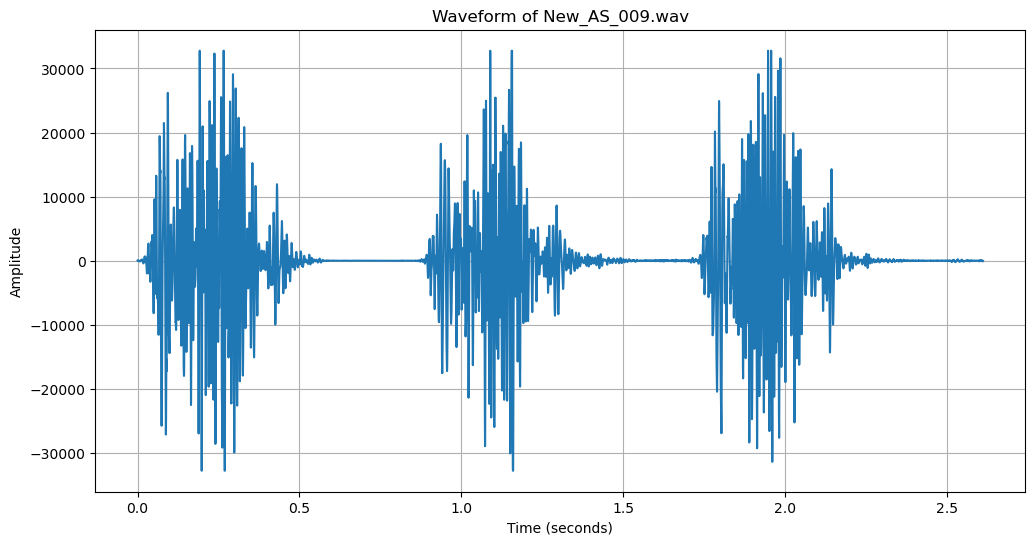

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Create a time array in seconds
duration = len(data) / sample_rate
time = np.linspace(0, duration, num=len(data))
# Plot the waveform
plt.figure(figsize=(12, 6))
plt.plot(time, data)
plt.title("Waveform of New_AS_009.wav")
plt.xlabel("Time (seconds)")    
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

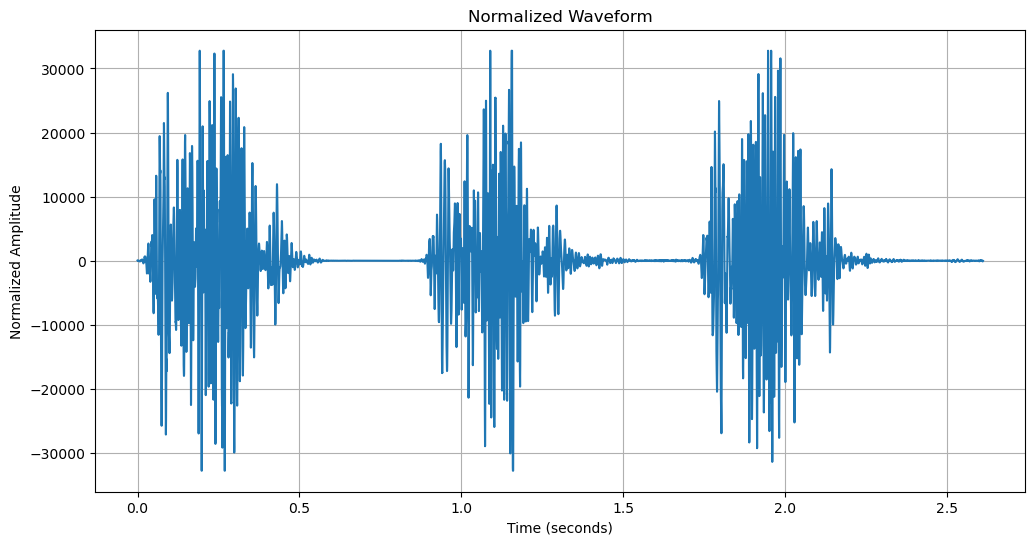

In [5]:
# Plot the normalized waveform
normalized_data = data / np.max(np.abs(data))
plt.figure(figsize=(12, 6))
plt.plot(time, data)
plt.title("Normalized Waveform")
plt.xlabel("Time (seconds)")
plt.ylabel("Normalized Amplitude")
plt.grid(True)
plt.show()

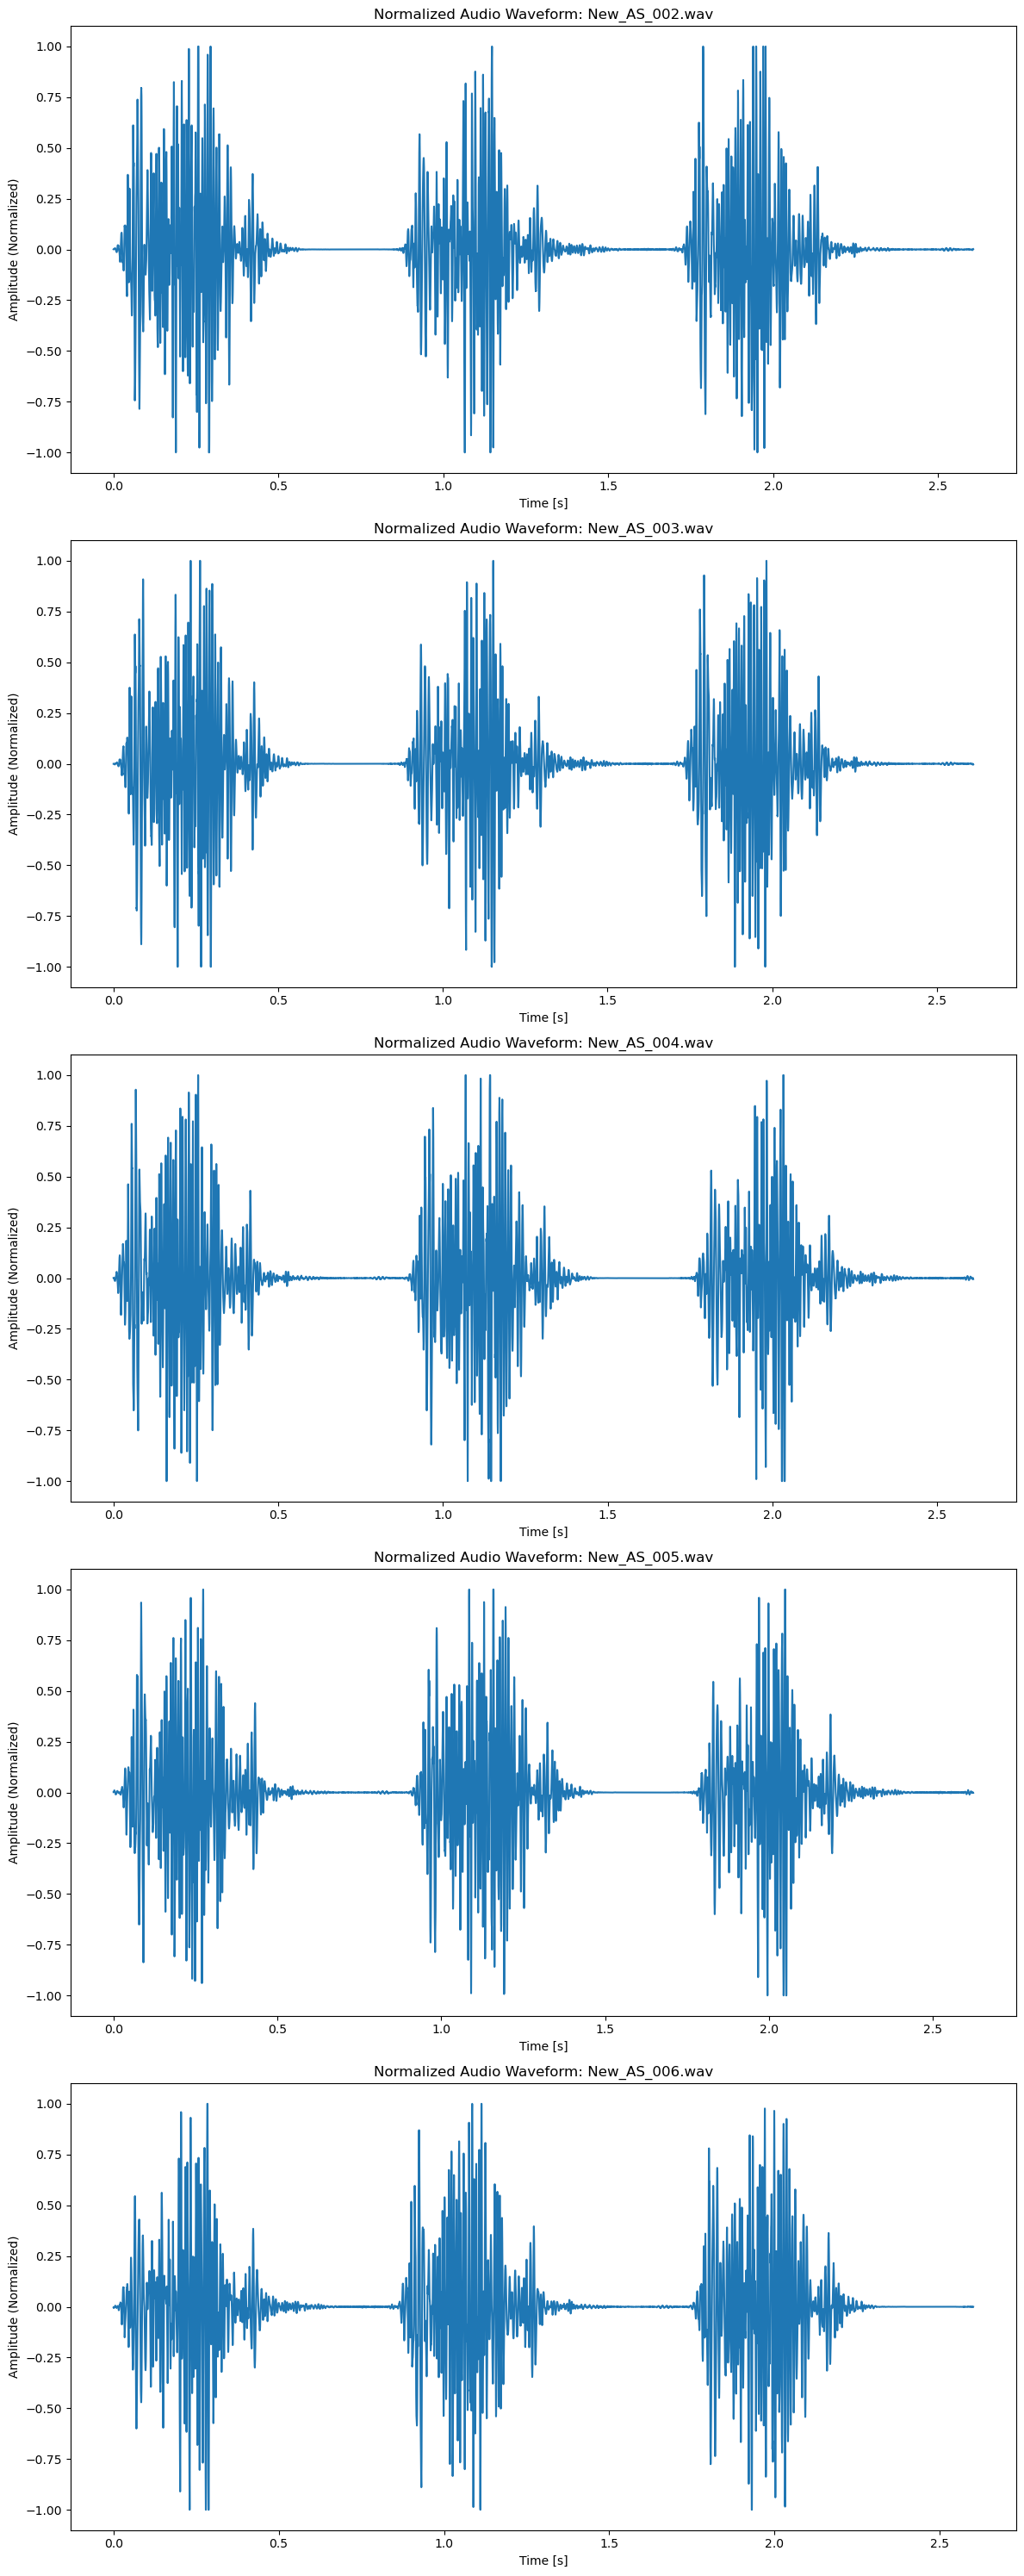

In [9]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import os

file_paths = ["New_AS_002.wav", "New_AS_003.wav", "New_AS_004.wav", "New_AS_005.wav", "New_AS_006.wav"]


fig, axes = plt.subplots(len(file_paths), 1, figsize=(12, 6 * len(file_paths)))

for i, file_path in enumerate(file_paths):
    sample_rate, data = wavfile.read(file_path)
    time = data.shape[0] / sample_rate
    time_array = np.linspace(0., time, data.shape[0])
    normalized_data = data / np.max(np.abs(data))

    axes[i].plot(time_array, normalized_data)
    axes[i].set_xlabel("Time [s]")
    axes[i].set_ylabel("Amplitude (Normalized)")
    axes[i].set_title(f"Normalized Audio Waveform: {os.path.basename(file_path)}")

plt.tight_layout()
plt.show()

Sample Rate: 8000 Hz
Data shape: (20849,)
Duration: 2.606125 seconds


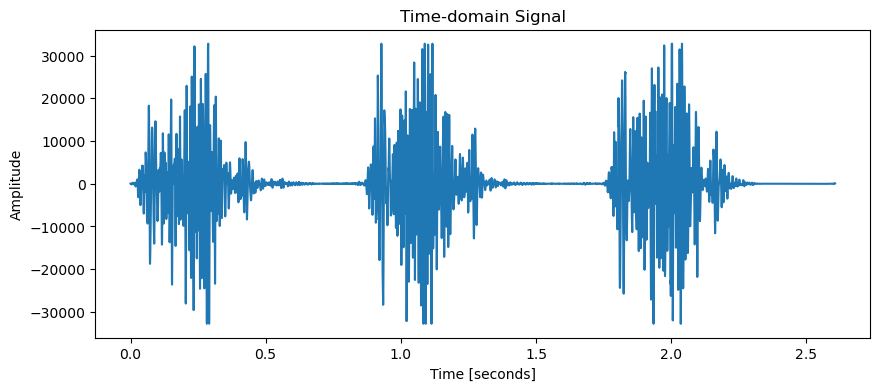

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Step 1: Load the .wav file
sample_rate, data = wavfile.read('New_AS_001.wav')

# Print general information
print(f"Sample Rate: {sample_rate} Hz")
print(f"Data shape: {data.shape}")
print(f"Duration: {data.shape[0] / sample_rate} seconds")

# Step 2: Plot the time-domain signal (Amplitude vs Time)
time = np.linspace(0, data.shape[0] / sample_rate, num=data.shape[0])

plt.figure(figsize=(10, 4))
plt.plot(time, data)
plt.title("Time-domain Signal")
plt.xlabel("Time [seconds]")
plt.ylabel("Amplitude")
# plt.grid(True)
plt.show()

In [14]:
# Step 1: Load the .wav file
sample_rate, data = wavfile.read('New_AS_001.wav')

# Step 2: Get basic information about the data
num_samples = data.shape[0]  # Number of samples (time points)
num_channels = data.shape[1] if data.ndim > 1 else 1  # Check for stereo or mono
duration = num_samples / sample_rate  # Duration in seconds
sample_type = data.dtype  # Data type (e.g., int16, int32)

# Calculate the maximum and minimum amplitude values
max_amplitude = np.max(data)
min_amplitude = np.min(data)

# Step 3: Display information
print("==== Audio File Information ====")
print(f"Sample Rate: {sample_rate} Hz")
print(f"Number of Samples: {num_samples}")
print(f"Number of Channels: {num_channels}")
print(f"Duration: {duration:.2f} seconds")
print(f"Sample Type: {sample_type}")
print(f"Maximum Amplitude: {max_amplitude}")
print(f"Minimum Amplitude: {min_amplitude}")
print(f"Data Shape: {data.shape}")
print(f"Bit Depth: {data.itemsize * 8} bits")

==== Audio File Information ====
Sample Rate: 8000 Hz
Number of Samples: 20849
Number of Channels: 1
Duration: 2.61 seconds
Sample Type: int16
Maximum Amplitude: 32767
Minimum Amplitude: -32768
Data Shape: (20849,)
Bit Depth: 16 bits


FFT

Dominant Frequency: 12.90 Hz with magnitude 15687640.65


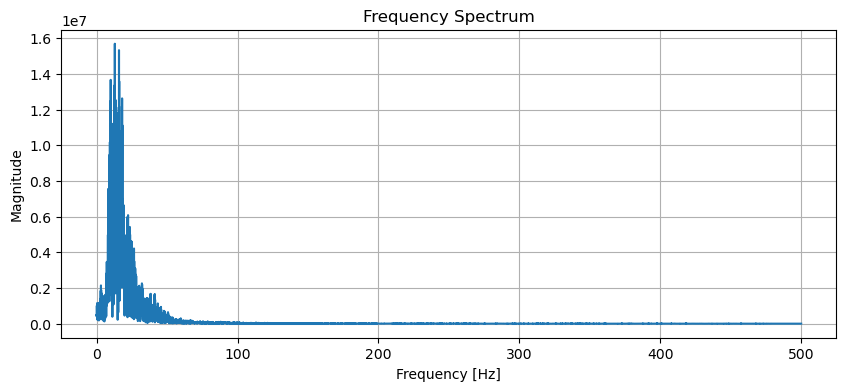

In [15]:
# Step 3: Frequency analysis using FFT
# Perform FFT on the first channel (if stereo)
if data.ndim > 1:
    data = data[:, 0]

# Compute FFT
fft_data = np.fft.fft(data)
fft_freq = np.fft.fftfreq(len(fft_data), 1 / 1000)
fft_magnitude = np.abs(fft_data)

# Step 4: Find the dominant frequency
# Ignore the negative frequencies by considering only the positive frequencies
positive_freqs = fft_freq[:len(fft_freq)//2]
positive_magnitudes = fft_magnitude[:len(fft_magnitude)//2]

# Find the index of the maximum magnitude
dominant_freq_index = np.argmax(positive_magnitudes)

# Get the dominant frequency
dominant_freq = positive_freqs[dominant_freq_index]
dominant_magnitude = positive_magnitudes[dominant_freq_index]

# Print the dominant frequency
print(f"Dominant Frequency: {dominant_freq:.2f} Hz with magnitude {dominant_magnitude:.2f}")

# Step 5: Plot the frequency spectrum
plt.figure(figsize=(10, 4))
plt.plot(positive_freqs, positive_magnitudes)  # Plot positive frequencies
plt.title("Frequency Spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()


STFT

  Using cached librosa-0.11.0-py3-none-any.whl.metadata (8.7 kB)
  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
Using cached librosa-0.11.0-py3-none-any.whl (260 kB)
Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 2.4 MB/s eta 0:00:01
   ------------------ --------------------- 1.3/2.8 MB 2.4 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.8 MB 2.5 MB/s eta 0:00:01
   ------------------------------------- -- 2.6/2.8 MB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
    --------------------------------------- 0.5/30.3 MB 2.1 MB/s eta 0:00:15
   - -------------------------------------- 1.0/30.3 MB 2.4 MB/s eta 0:00:13
   -- ---------------------

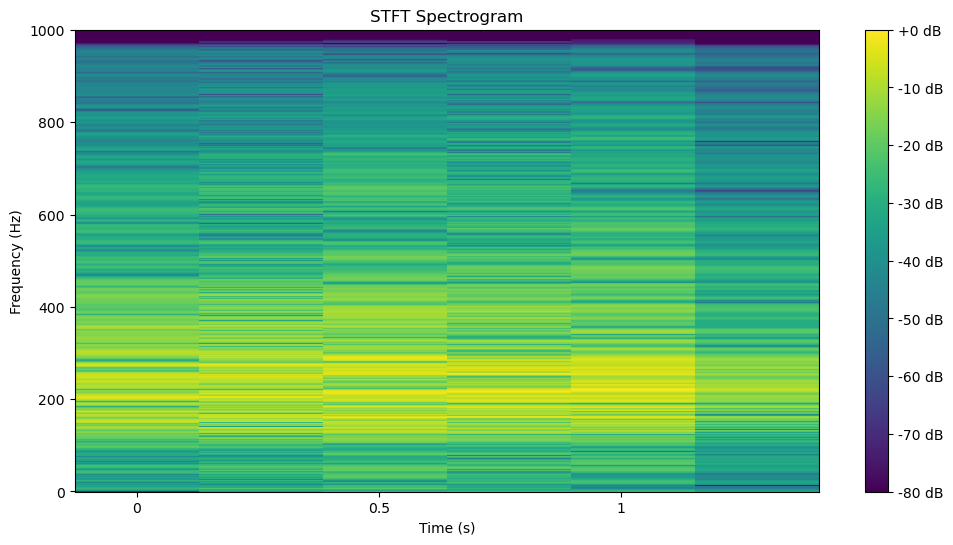

In [19]:
%pip install librosa

import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np

# Load the WAV file
sample_rate, data = wavfile.read('New_AS_001.wav')

# Convert data to float (if it's not already in a floating-point format)
data = data.astype(float)

data = librosa.resample(data, orig_sr = sample_rate, target_sr = 1000)

# Compute the STFT
stft_result = librosa.stft(data)

# Convert amplitude to decibels
db_spectrogram = librosa.amplitude_to_db(abs(stft_result), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(db_spectrogram, sr=2000, x_axis='time', y_axis='hz', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()


DWT Analysis

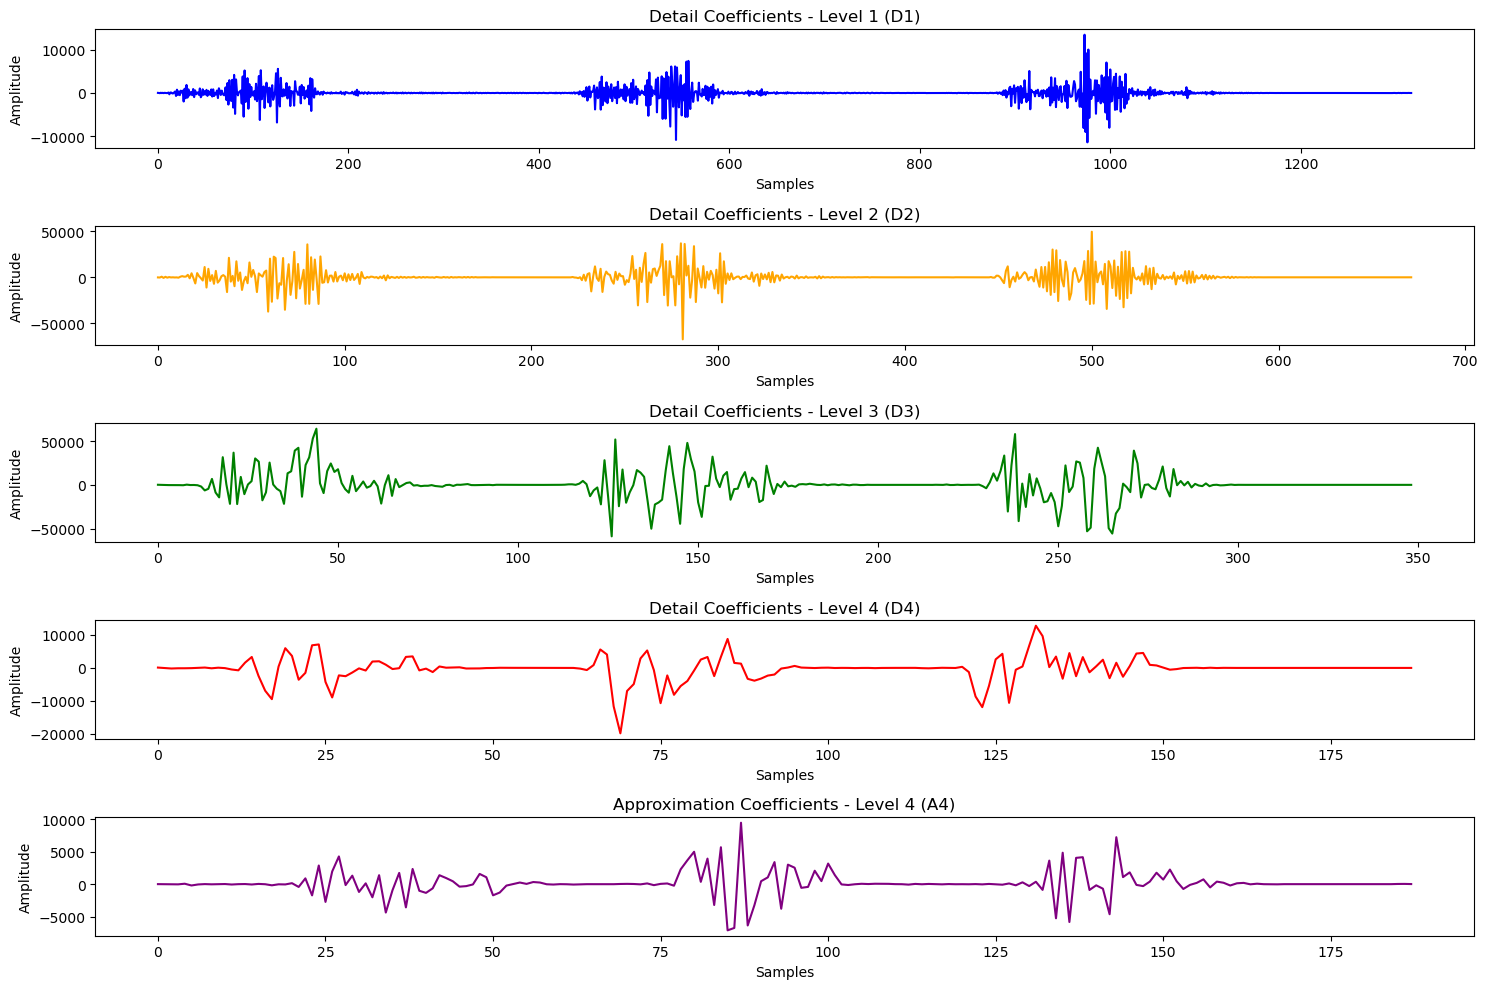

In [20]:
import pywt
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the WAV file
sample_rate, data = wavfile.read('New_AS_001.wav')

# Normalize data to float (if needed)
data = data.astype(float)

data = librosa.resample(data, orig_sr = sample_rate, target_sr = 1000)

# Perform a 4-level DWT decomposition with 'db14'
wavelet = 'db14'
coeffs = pywt.wavedec(data, wavelet, level=4)

# Extract details and approximation coefficients
cA4, cD4, cD3, cD2, cD1 = coeffs

# Plot the coefficients
plt.figure(figsize=(15, 10))

# Plot D1
plt.subplot(5, 1, 1)
plt.plot(cD1, color='blue')
plt.title('Detail Coefficients - Level 1 (D1)')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

# Plot D2
plt.subplot(5, 1, 2)
plt.plot(cD2, color='orange')
plt.title('Detail Coefficients - Level 2 (D2)')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

# Plot D3
plt.subplot(5, 1, 3)
plt.plot(cD3, color='green')
plt.title('Detail Coefficients - Level 3 (D3)')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

# Plot D4
plt.subplot(5, 1, 4)
plt.plot(cD4, color='red')
plt.title('Detail Coefficients - Level 4 (D4)')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

# Plot A4
plt.subplot(5, 1, 5)
plt.plot(cA4, color='purple')
plt.title('Approximation Coefficients - Level 4 (A4)')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

# Adjust layout
plt.tight_layout()
plt.show()


CWT

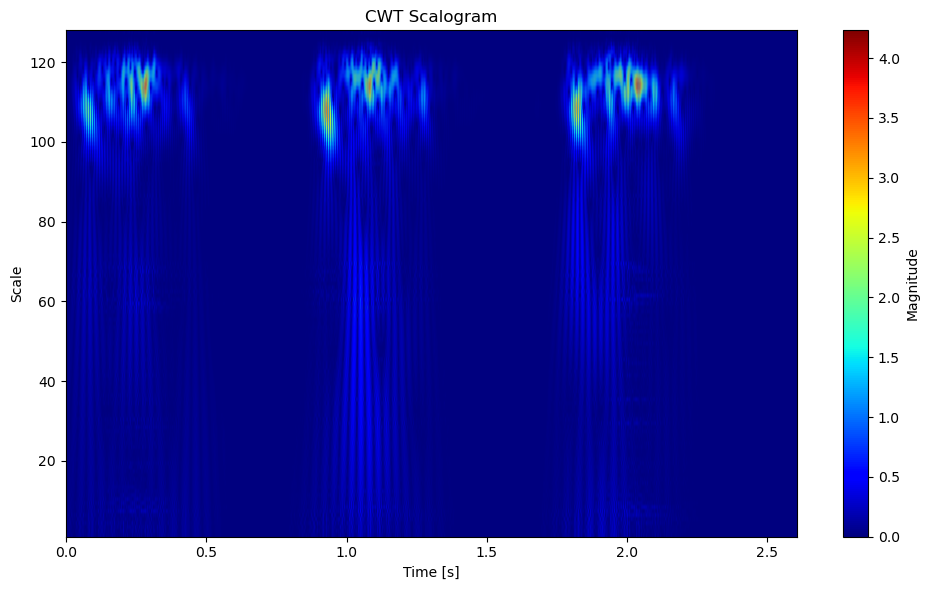

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import resample
import pywt

# Step 1: Read the WAV file
file_path = 'New_AS_001.wav'
signal, sample_rate = sf.read(file_path)

# Step 2: Resample to 2kHz
new_sample_rate = 2000  # Resampling to 2 kHz
num_samples = int(len(signal) * new_sample_rate / sample_rate)
resampled_signal = resample(signal, num_samples)

# Step 3: Apply Continuous Wavelet Transform (CWT)
widths = np.arange(1, 128)  # Scale levels for CWT
cwt_coefficients, freqs = pywt.cwt(resampled_signal, widths, 'morl', sampling_period=1/new_sample_rate)

# Step 4: Plot CWT (Scalogram)
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(cwt_coefficients), extent=[0, len(resampled_signal)/new_sample_rate, 1, 128], cmap='jet', aspect='auto')
plt.title('CWT Scalogram')
plt.xlabel('Time [s]')
plt.ylabel('Scale')
plt.colorbar(label='Magnitude')
plt.tight_layout()
plt.show()

MFCC

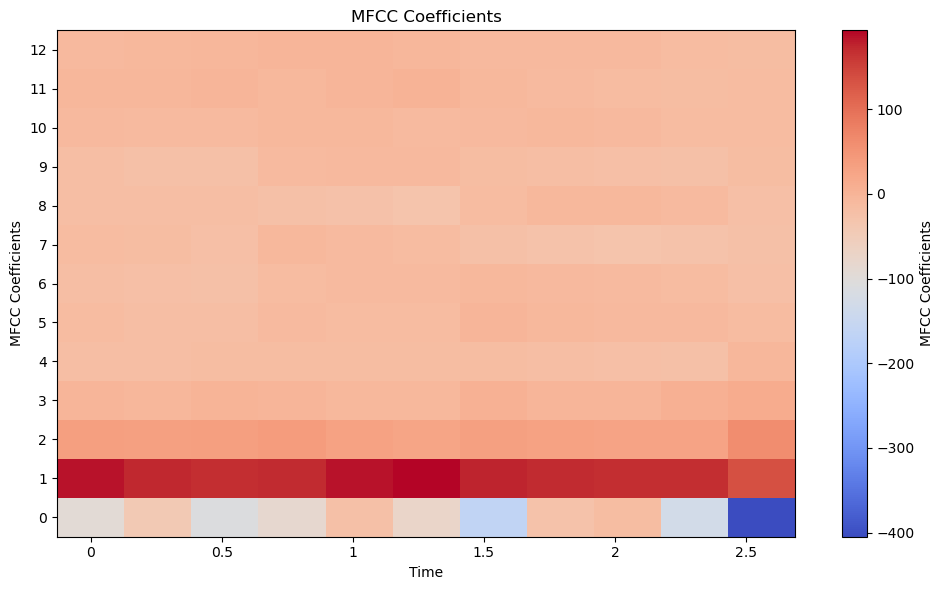

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import resample
import librosa
import librosa.display

# Step 1: Read the WAV file
file_path = 'New_AS_001.wav'  # Replace with the actual path to your wav file
signal, sample_rate = sf.read(file_path)

# Step 2: Resample to 2kHz
new_sample_rate = 2000  # Resampling to 2 kHz
num_samples = int(len(signal) * new_sample_rate / sample_rate)
resampled_signal = resample(signal, num_samples)

# Step 3: Compute MFCCs
mfccs = librosa.feature.mfcc(y=resampled_signal.astype(float), sr=new_sample_rate, n_mfcc=13)

# Step 4: Plot MFCCs with custom y-axis labels (0 to 13)
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time', sr=new_sample_rate)
plt.colorbar(label='MFCC Coefficients')
plt.title('MFCC Coefficients')
plt.ylabel('MFCC Coefficients')  # Y-axis label
plt.yticks(ticks=np.arange(0, 13), labels=np.arange(0, 13))  # Set y-ticks to show 0 to 13
plt.tight_layout()
plt.show()
